In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [3]:
background_hist = load("../data/experiment/dataset_2/m2/background.jld2");

In [4]:
hist_cam_tmp = background_hist["cam_3"];

α = 2
μ = 60

array_ind = 1:4096

edges = hist_cam_tmp.edges[1][1:end-1]
background_vals = hist_cam_tmp.weights

signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)

signal_conv = DSP.conv(signal_vals, background_vals)[1:4096]

# signal_vals = signal_vals ./ sum(signal_vals);

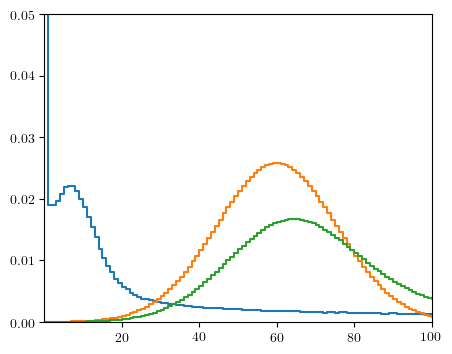

(0.0, 0.05)

In [5]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.step(edges, background_vals, where="post")
ax.step(edges, signal_vals, where="post")
ax.step(edges, signal_conv, where="post")

ax.set_xlim(0.01, 100)
ax.set_ylim(0.0, 0.05)

# ax.set_yscale("log")
# ax.set_xscale("log")

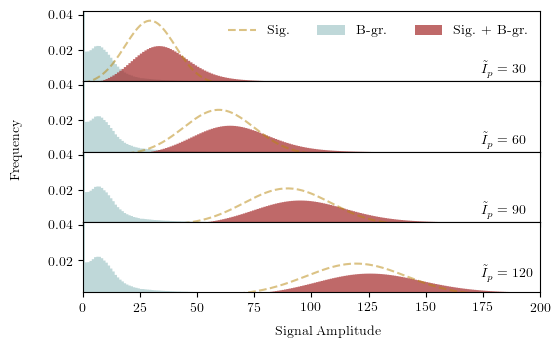

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


PyObject Text(0.45, 0.001, 'Signal Amplitude')

In [6]:
backgroundcolor = "cadetblue"
signalcolor = "darkgoldenrod"
convcolor = "brown" 

fig, ax = plt.subplots(4,1, figsize=(5.905631659056317, 3.649881090334235), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

#subplot 1:
μ = 30
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[1].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B-gr.")
ax[1].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "Sig.")
# ax[1].step(edges, signal_conv, where="post", alpha=1, linewidth=2, color=convcolor, label = "S - B")
ax[1].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "Sig. + B-gr.")
ax[1].text(0.87,0.1,L"\tilde{I}_p=30", transform=ax[1].transAxes)
ax[1].legend(loc="upper right", ncol=3, framealpha=0.0)

#subplot 2:
μ = 60
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[2].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[2].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[2].text(0.87,0.1,L"\tilde{I}_p=60", transform=ax[2].transAxes)

#subplot 3:
μ = 90
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[3].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[3].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[3].text(0.87,0.1,L"\tilde{I}_p=90", transform=ax[3].transAxes)

#subplot 4:
μ = 120
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[4].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[4].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[4].text(0.87,0.2,L"\tilde{I}_p=120", transform=ax[4].transAxes)

ax[1].set_xlim(0.0, 200)
ax[1].set_ylim(0.002, 0.042)

fig.text(0.002, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.001, "Signal Amplitude", va="center", rotation="horizontal")
# fig.text(0.25, 0.9, "Signal + Background Superposition [Camera #3]", va="center", rotation="horizontal")

# fig.savefig("../plots/signal-back-conv.pdf", bbox_inches = "tight")

In [7]:
function direct_conv(a::Array{T}, b::Array{T}) where {T <: AbstractFloat}
    m = length(a)
    n = length(b)
    c = zeros(T,m+n-1)
    @inbounds @simd for j=1:m
        @inbounds @simd for k=1:n
            c[j+k-1] += a[j]*b[k]
        end
    end
    return c
end

direct_conv (generic function with 1 method)

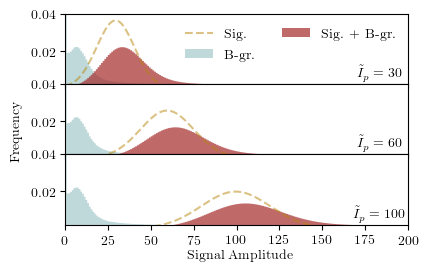

PyObject Text(0.4, 1e-05, 'Signal Amplitude')

In [8]:
backgroundcolor = "cadetblue"
signalcolor = "darkgoldenrod"
convcolor = "brown" 

fig, ax = plt.subplots(3,1, figsize=(4.429223744292238, 2.737410817750676), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

#subplot 1:
μ = 30
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[1].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B-gr.")
ax[1].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "Sig.")
# ax[1].step(edges, signal_conv, where="post", alpha=1, linewidth=2, color=convcolor, label = "S - B")
ax[1].fill_between(edges, signal_conv, step="post", alpha=0.7, linewidth=0, color=convcolor, label = "Sig. + B-gr.")
ax[1].text(0.85,0.1,L"\tilde{I}_p=30", transform=ax[1].transAxes)
ax[1].legend(loc="upper right", ncol=2, framealpha=0.0)

#subplot 2:
μ = 60
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[2].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[2].fill_between(edges, signal_conv, step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[2].text(0.85,0.1,L"\tilde{I}_p=60", transform=ax[2].transAxes)


#subplot 4:
μ = 100
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[3].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B-gr.")
ax[3].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "Sig.")
ax[3].fill_between(edges, signal_conv, step="post", alpha=0.7, linewidth=0, color=convcolor, label = "Sig. + B-gr.")
ax[3].text(0.84,0.1,L"\tilde{I}_p=100", transform=ax[3].transAxes)


ax[1].set_xlim(0.0, 200)
ax[1].set_ylim(0.002, 0.04)

fig.text(0.001, 0.45, "Frequency", va="center", rotation="vertical")
fig.text(0.40, 0.00001, "Signal Amplitude", va="center", rotation="horizontal")
# fig.text(0.25, 0.9, "Signal + Background Superposition [Camera #3]", va="center", rotation="horizontal")

# fig.savefig("../plots/signal-back-conv.pdf", bbox_inches = "tight")

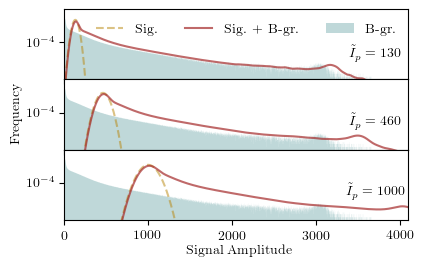

In [9]:
backgroundcolor = "cadetblue"
signalcolor = "darkgoldenrod"
convcolor = "brown" 

fig, ax = plt.subplots(3,1, figsize=(4.429223744292238, 2.737410817750676), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

#subplot 1:
μ = 130
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = direct_conv(signal_vals, background_vals)[array_ind]

ax[1].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B-gr.")
ax[1].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "Sig.")
# ax[1].step(edges, signal_conv, where="post", alpha=1, linewidth=2, color=convcolor, label = "S - B")
ax[1].plot(edges, signal_conv, alpha=0.7, linewidth=1.5, color=convcolor, label = "Sig. + B-gr.")
ax[1].text(0.83,0.32,L"\tilde{I}_p=130", transform=ax[1].transAxes)
ax[1].legend(loc="upper right", ncol=3, framealpha=0.0)

#subplot 2:
μ = 460
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = direct_conv(signal_vals, background_vals)[array_ind]

ax[2].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[2].plot(edges, signal_conv,alpha=0.7, linewidth=1.5, color=convcolor, label = "S - B")
ax[2].text(0.83,0.35,L"\tilde{I}_p=460", transform=ax[2].transAxes)

#subplot 4:
μ = 1000
signal_vals = cdf.(Normal(μ, α*sqrt(μ)), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_vals = signal_vals ./sum(signal_vals)
signal_conv = direct_conv(signal_vals, background_vals)[array_ind]

ax[3].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[3].plot(edges, signal_conv, alpha=0.7, linewidth=1.5, color=convcolor, label = "S - B")
ax[3].text(0.82,0.35,L"\tilde{I}_p=1000", transform=ax[3].transAxes)

ax[1].set_xlim(0.0, 2^12)
ax[1].set_ylim(0.00000002, 0.2)

fig.text(0.002, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.40, 0.001, "Signal Amplitude", va="center", rotation="horizontal")
# fig.text(0.25, 0.9, "Signal + Background Superposition [Camera #3]", va="center", rotation="horizontal")

ax[1].set_yscale("log")
# ax[1].set_xscale("log")

# fig.savefig("../plots/signal-back-feat.pdf", bbox_inches = "tight")

In [11]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

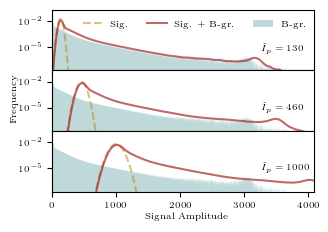

In [19]:
backgroundcolor = "cadetblue"
signalcolor = "darkgoldenrod"
convcolor = "brown" 

fig, ax = plt.subplots(3,1, figsize=(3.375, 0.7*3.375), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

#subplot 1:
μ = 130
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = direct_conv(signal_vals, background_vals)[array_ind]

ax[1].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B-gr.")
ax[1].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "Sig.")
# ax[1].step(edges, signal_conv, where="post", alpha=1, linewidth=2, color=convcolor, label = "S - B")
ax[1].plot(edges, signal_conv, alpha=0.7, linewidth=1.5, color=convcolor, label = "Sig. + B-gr.")
ax[1].text(0.8,0.32,L"\tilde{I}_p=130", transform=ax[1].transAxes)
ax[1].legend(loc="upper right", ncol=3, framealpha=0.0)

#subplot 2:
μ = 460
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = direct_conv(signal_vals, background_vals)[array_ind]

ax[2].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[2].plot(edges, signal_conv,alpha=0.7, linewidth=1.5, color=convcolor, label = "S - B")
ax[2].text(0.8,0.35,L"\tilde{I}_p=460", transform=ax[2].transAxes)

#subplot 4:
μ = 1000
signal_vals = cdf.(Normal(μ, α*sqrt(μ)), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_vals = signal_vals ./sum(signal_vals)
signal_conv = direct_conv(signal_vals, background_vals)[array_ind]

ax[3].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[3].plot(edges, signal_conv, alpha=0.7, linewidth=1.5, color=convcolor, label = "S - B")
ax[3].text(0.8,0.35,L"\tilde{I}_p=1000", transform=ax[3].transAxes)

ax[1].set_xlim(0.0, 2^12)
ax[1].set_ylim(0.00000002, 0.2)

fig.text(0.00002, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.40, 0.0001, "Signal Amplitude", va="center", rotation="horizontal")
# fig.text(0.25, 0.9, "Signal + Background Superposition [Camera #3]", va="center", rotation="horizontal")

ax[1].set_yscale("log")
# ax[1].set_xscale("log")

fig.savefig("../plots-prl/signal-back-feat.pdf", bbox_inches = "tight")